In [1]:
import matplotlib.pyplot as plt
from ema_workbench.analysis import prim
import pandas as pd

/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/ema_workbench/em_framework/evaluators.py:58: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_d

In [2]:
def visualize_precision_and_recall(precision_train, recall_train, precision_test, recall_test):
    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(recall_train, precision_train, c='blue', marker='o')

    plt.scatter(recall_test, precision_test, c='red', marker='o')

    plt.xlim(0, 1.1)
    plt.ylim(0, 1.1)

    # Add labels and a legend
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision vs. Recall')
    plt.legend()

    # Display the plot
    plt.grid(True)
    return plt

def define_y_x_all_data(data_name, stratify_feature, drop_feature):
    data = []
    if (data_name) == 'Bryant':
        data = pd.read_csv(
            '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Data/Bryant et al 2010.csv')

    else:
        if (data_name) == 'Rozenberg':
            data = pd.read_csv(
                '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Data/Rozenberg et al 2014.csv')
            
    y = data[stratify_feature]
    x = pd.DataFrame(data.drop(columns=drop_feature))
    
    return x, y

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

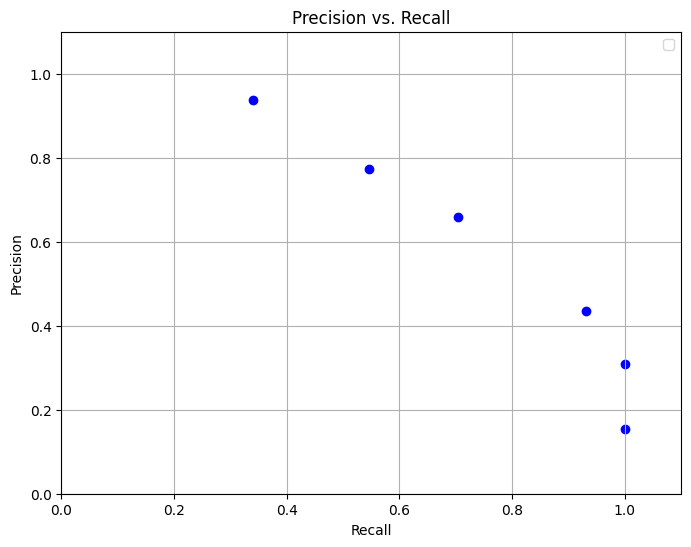

In [5]:
#baseline normal dataset, not modified

prec_baseline = []
rec_baseline = []

x, y = define_y_x_all_data('Rozenberg', 'SSP1', ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'])

prim_alg = prim.Prim(x.values, y, threshold=0.8, peel_alpha=0.1)
boxes1 = prim_alg.find_box()

for index, row in boxes1.peeling_trajectory.iterrows():
        rec_baseline.append(row['coverage'])
        prec_baseline.append(row['density'])

visualize_precision_and_recall(prec_baseline, rec_baseline, [], [])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

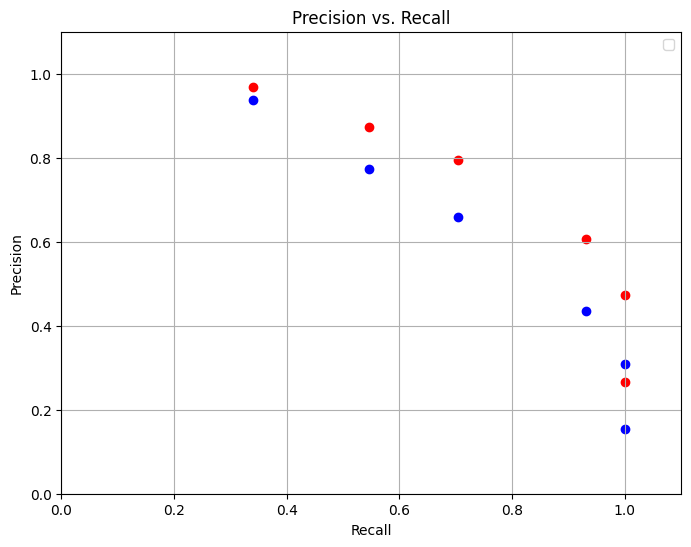

In [6]:
#duplicate all 1en
prec_DupOnes = []
rec_DupOnes = []

x, y = define_y_x_all_data('Rozenberg', 'SSP1', ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'])

labels4 = y.copy()
data4 = x.copy()

# Iterate over each row of temp_data and duplicate a points with label 1
for index, row in x.iterrows():
    if y[index] == 1:
        data4.loc[len(data4)] = row
        labels4.loc[len(labels4)] = y[index]

prim_alg4 = prim.Prim(data4.values, labels4, threshold=0.8, peel_alpha=0.1)
boxes4 = prim_alg4.find_box()
    
for index, row in boxes4.peeling_trajectory.iterrows():
    rec_DupOnes.append(row['coverage'])
    prec_DupOnes.append(row['density'])

visualize_precision_and_recall(prec_baseline, rec_baseline, prec_DupOnes, rec_DupOnes)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

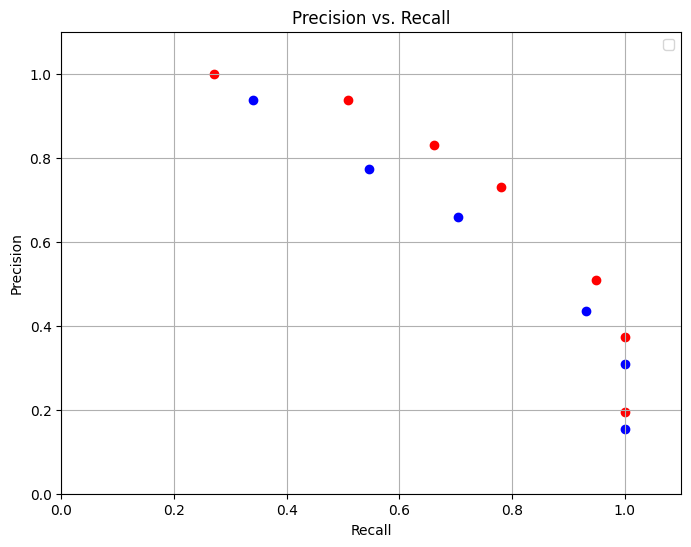

In [7]:
#duplicate 1 in best box
lims = boxes1.box_lims

prec_DupOnesBestBoxes = []
rec_DupOnesBestBoxes = []

x, y = define_y_x_all_data('Rozenberg', 'SSP1', ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'])

labels3 = y.copy()
data3 = x.copy()

# Iterate over each row of x and duplicate the points which are tp for each box found by prim
for index, row in x.iterrows():
    is_within_limits = True
    # Check if entry lies within the specified limits
    for a, (column, value) in enumerate(row.iteritems()):
        is_within_limits = (lims[len(lims) - 1].iloc[0, a] <= value <= lims[len(lims) - 1].iloc[1, a]) & is_within_limits
    if is_within_limits:
        data3.loc[len(data3)] = row
        labels3.loc[len(labels3)] = y[index]

prim_alg3 = prim.Prim(data3.values, labels3, threshold=0.8, peel_alpha=0.1)
boxes3 = prim_alg3.find_box()
    
for index, row in boxes3.peeling_trajectory.iterrows():
    rec_DupOnesBestBoxes.append(row['coverage'])
    prec_DupOnesBestBoxes.append(row['density'])

visualize_precision_and_recall(prec_baseline, rec_baseline, prec_DupOnesBestBoxes, rec_DupOnesBestBoxes)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

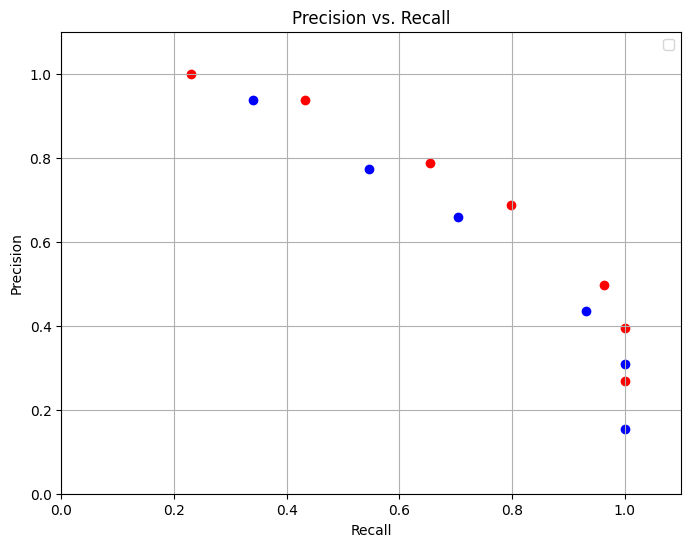

In [9]:
#duplicate 1 in all boxes
lims = boxes1.box_lims

rec_DupOnesAllBoxes = []
prec_DupOnesAllBoxes = []

x, y = define_y_x_all_data('Rozenberg', 'SSP1', ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'])

labels2 = y.copy()
data2 = x.copy()

#iterate over limit entries which is list of dataframes
for i in range(len(lims)):
    # Iterate over each row of temp_data
    for index, row in x.iterrows():
        is_within_limits = True
        a = 0
        # Check if entry lies within the specified limits
        for column, value in row.iteritems():
            is_within_limits = (lims[i].iloc[0, a] <= value <= lims[i].iloc[1, a]) & is_within_limits
            a = a + 1
        if is_within_limits:
            data2.loc[len(data2)] = row
            labels2.loc[len(labels2)] = y[index]

prim_alg2 = prim.Prim(data2.values, labels2, threshold=0.8, peel_alpha=0.1)
boxes2 = prim_alg2.find_box()
    
for index, row in boxes2.peeling_trajectory.iterrows():
    rec_DupOnesAllBoxes.append(row['coverage'])
    prec_DupOnesAllBoxes.append(row['density'])

visualize_precision_and_recall(prec_baseline, rec_baseline, prec_DupOnesAllBoxes, rec_DupOnesAllBoxes)